# Tasca M5 T02

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import random
#import math
import scipy.stats as stats

## Exercici 1
###Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

###També adjunt trobaràs una descripció de les diferents variables del dataset. 


In [ ]:
#https://github.com/Huanhotze/Sprint-5.-Introduccio-Test-Hipotesis-i-Machine-Learning/blob/main/M5_T02_Data/housing%20data.csv
url = 'https://raw.githubusercontent.com/Huanhotze/Sprint-5.-Introduccio-Test-Hipotesis-i-Machine-Learning/main/M5_T02_Data/housing%20data.csv'

data = pd.read_csv(url, header=None)
data.head()

0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2

El data set no incluye cabecera con el nombre de las columnas. Encontramos los atributos en el archivo adjunto del ejecicio. [housing data description.txt](https://github.com/Huanhotze/Sprint-5.-Introduccio-Test-Hipotesis-i-Machine-Learning/blob/main/M5_T02_Data/housing%20data%20description.txt)

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
data.columns = ["CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B_1000", "LSTAT", "MEDV"]
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  B_1000  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [ ]:
#len(data)
#data.dtypes
#data.describe()
#data.corr()
data.isna().values.any(), data.isnull().values.any()


(False, False)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['CRIM'],axis=1)
y = data['CRIM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Estudio descriptivo de X_train y X_test
Una vez separado en el conjunto train y test, en un estudio descriptivo se ve claramente su similitud a nivel estadistico, con la evidente diferencia del tamaño de ambos datasets donde X_train representa un 70% del original (354 filas) y X_test el 30% (152 filas).

In [ ]:
len(X_train), len(X_test)

(354, 152)

In [ ]:
print(f"{X_train.dtypes}\n\n")
print(X_test.dtypes)

ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B_1000     float64
LSTAT      float64
MEDV       float64
dtype: object


ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B_1000     float64
LSTAT      float64
MEDV       float64
dtype: object


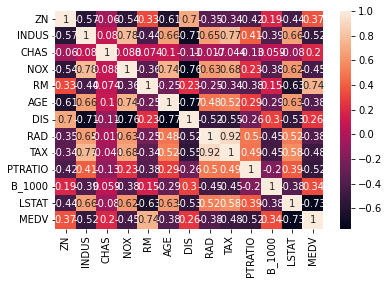

In [ ]:
corrX = X_train.corr()
sns.heatmap(corrX, annot=True)

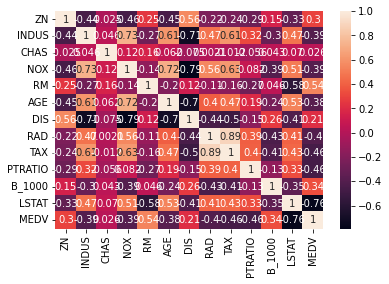

In [ ]:
corrX_test = X_test.corr()
sns.heatmap(corrX_test, annot=True)

In [ ]:
print(X_train.describe())
print("\n\n")
print(X_test.describe())

               ZN       INDUS        CHAS         NOX          RM         AGE  \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean    12.975989   10.824237    0.087571    0.554765    6.304907   67.846893   
std     25.265309    6.828468    0.283070    0.117107    0.736258   28.278191   
min      0.000000    0.460000    0.000000    0.385000    3.561000    6.000000   
25%      0.000000    4.950000    0.000000    0.448000    5.888250   41.200000   
50%      0.000000    8.560000    0.000000    0.538000    6.211000   76.700000   
75%     20.000000   18.100000    0.000000    0.631000    6.635000   93.600000   
max    100.000000   27.740000    1.000000    0.871000    8.725000  100.000000   

              DIS         RAD         TAX     PTRATIO      B_1000       LSTAT  \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean     3.832216    9.830508  409.954802   18.349435  353.194859   12.564379   
std      2.167105    8.8336

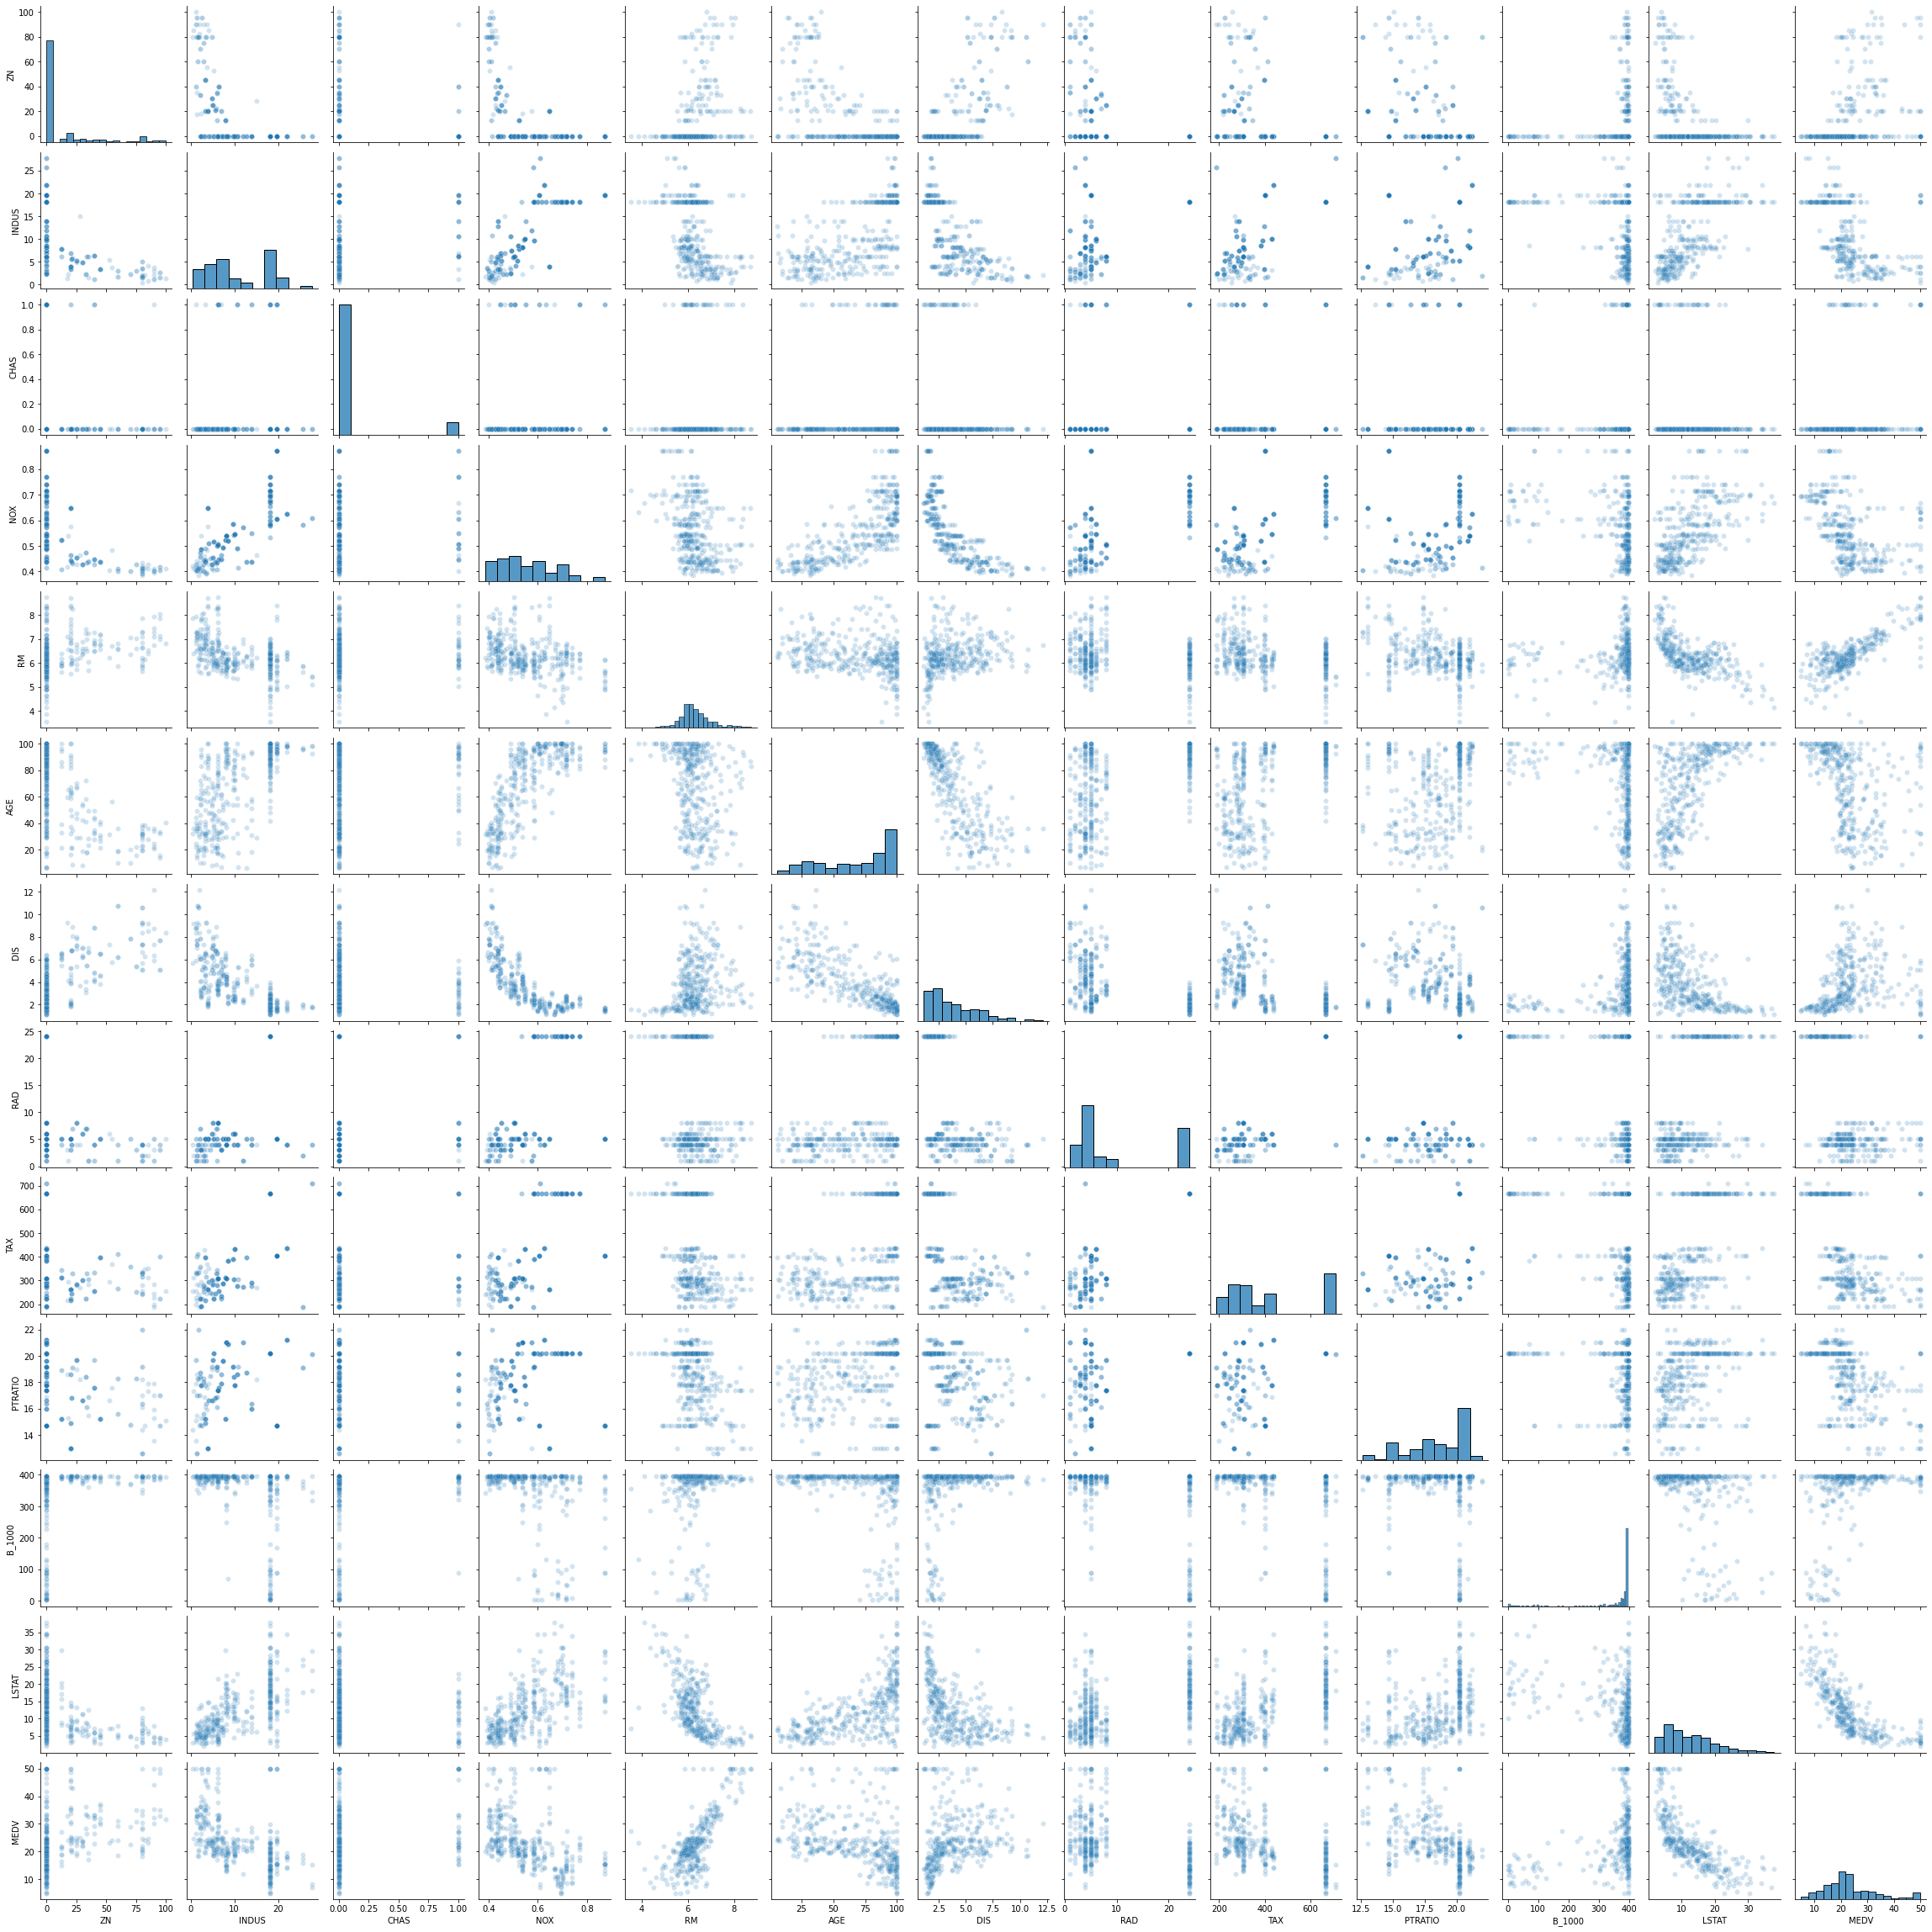

In [ ]:
sns.pairplot(X_train, diag_kind='hist', plot_kws={'alpha': 0.2})

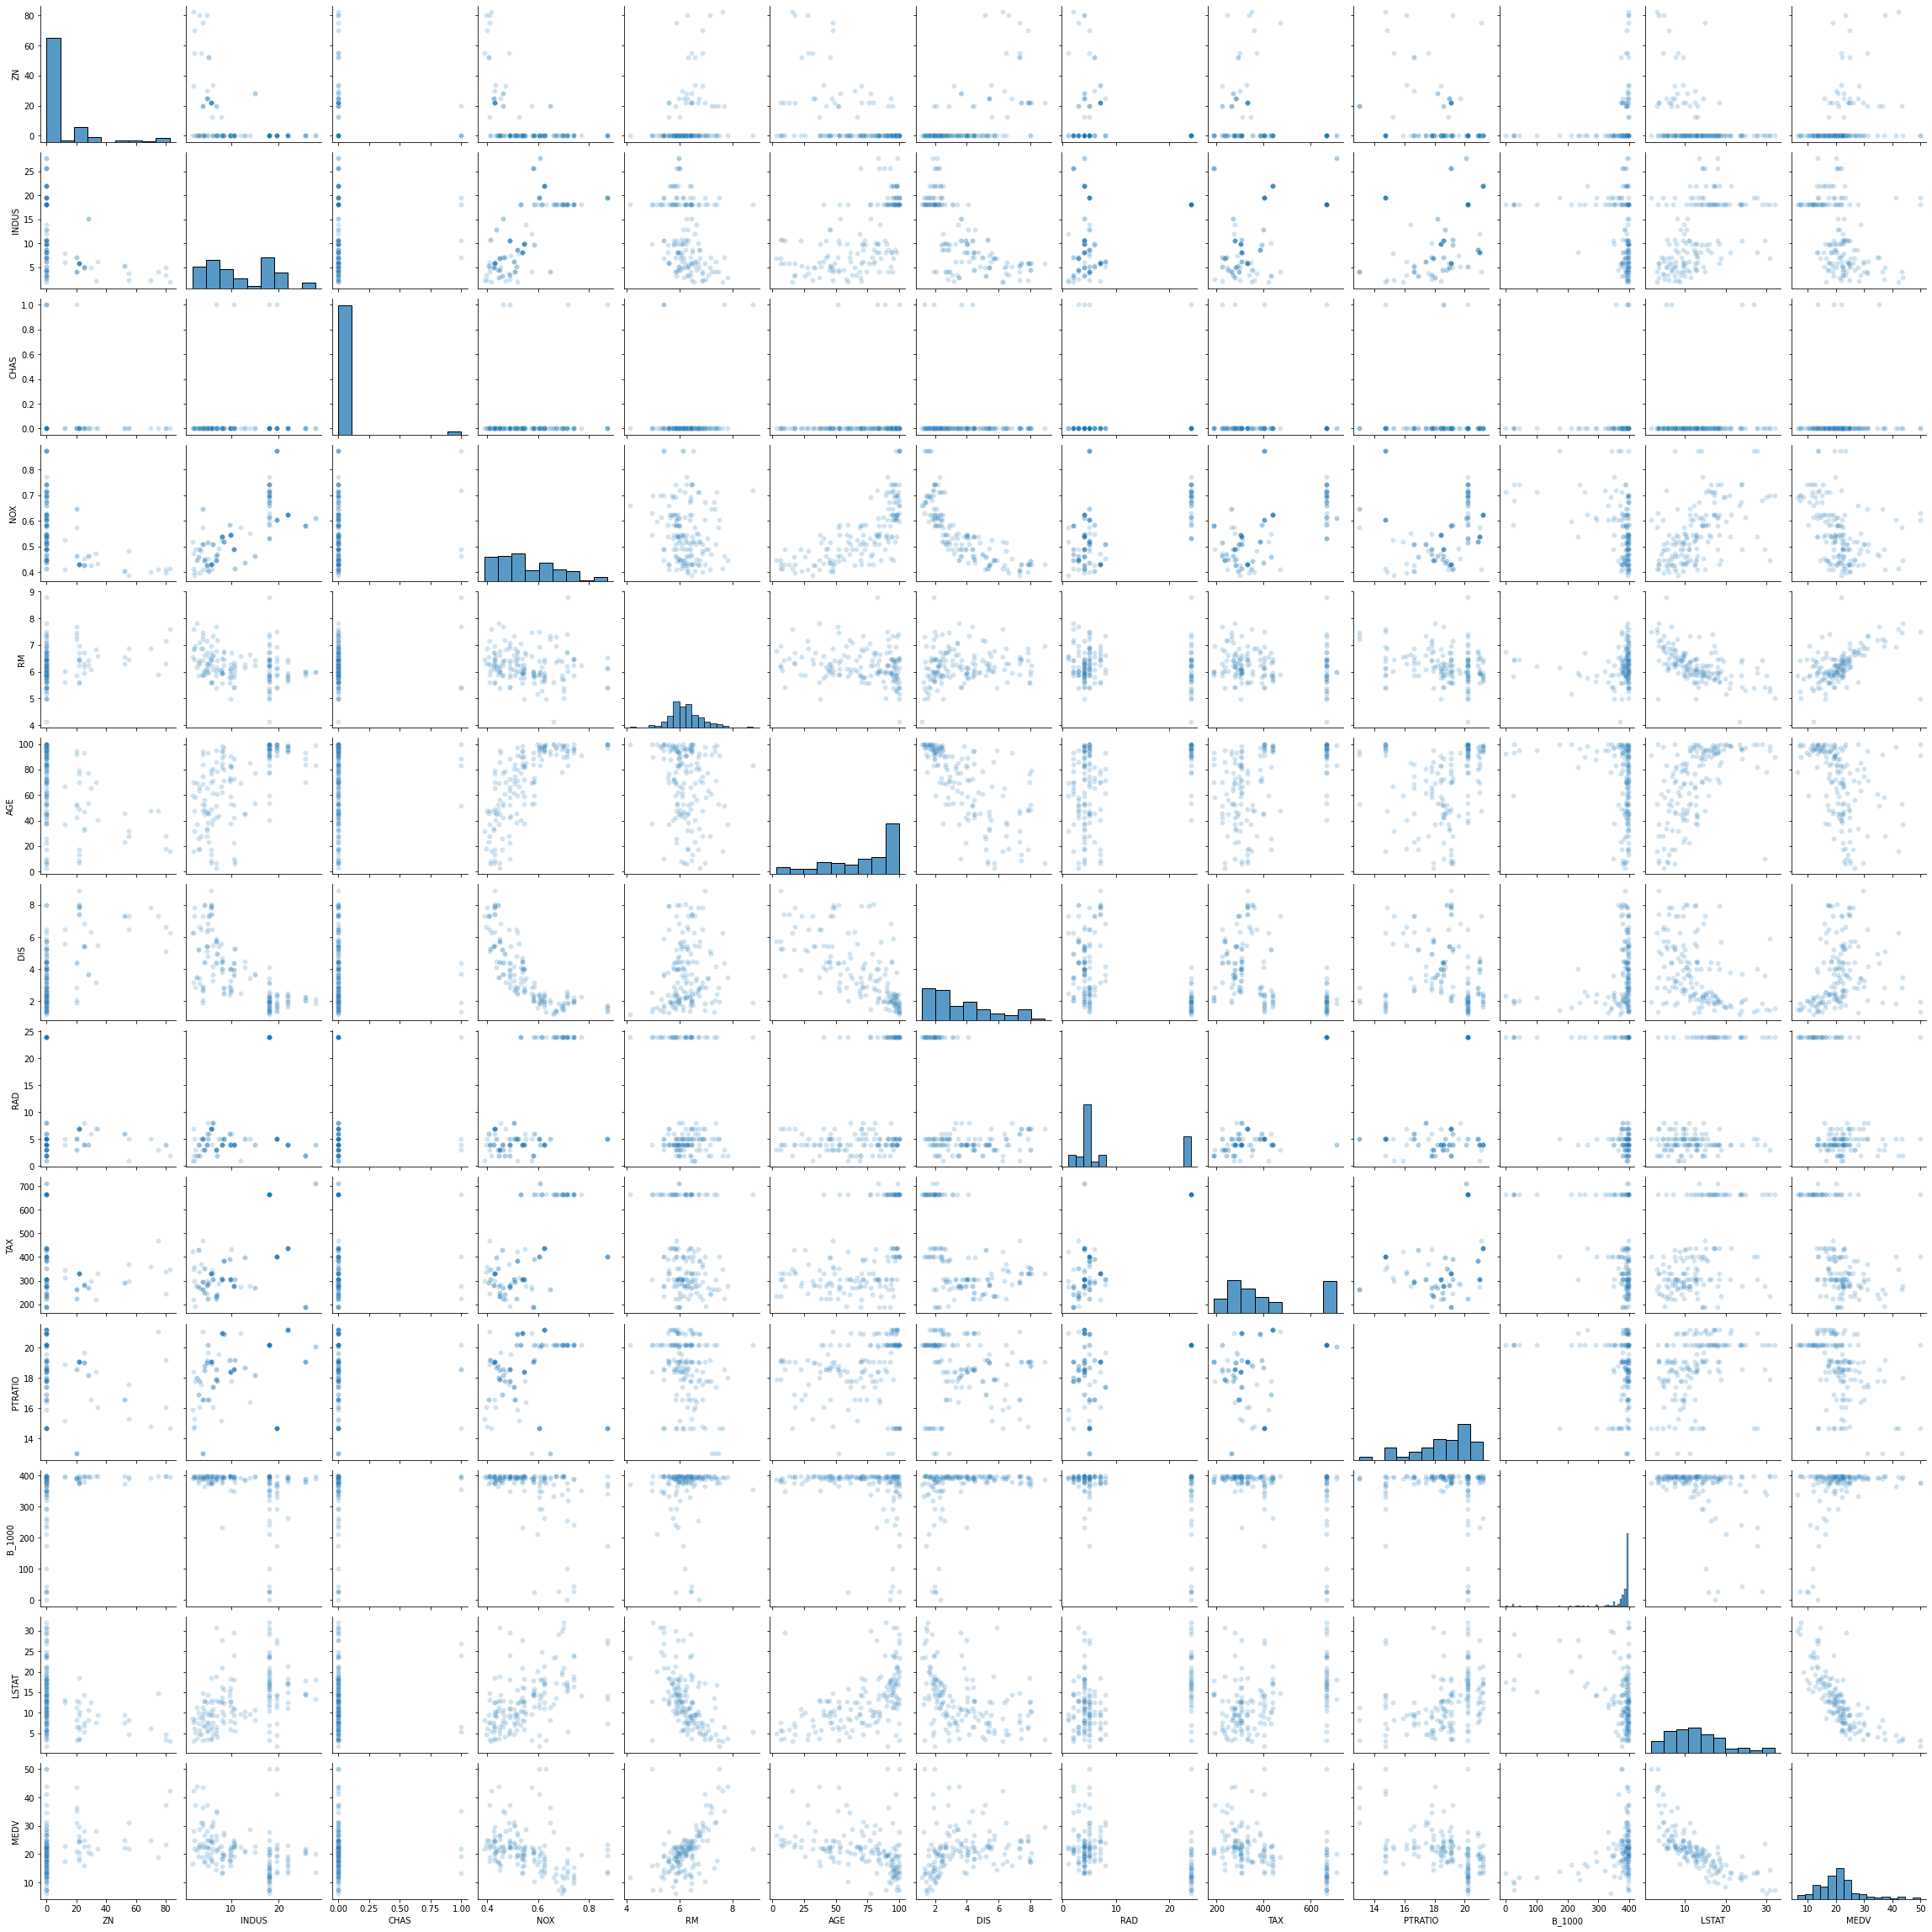

In [ ]:
sns.pairplot(X_test, diag_kind='hist', plot_kws={'alpha': 0.2})

## Exercici 2
###Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).



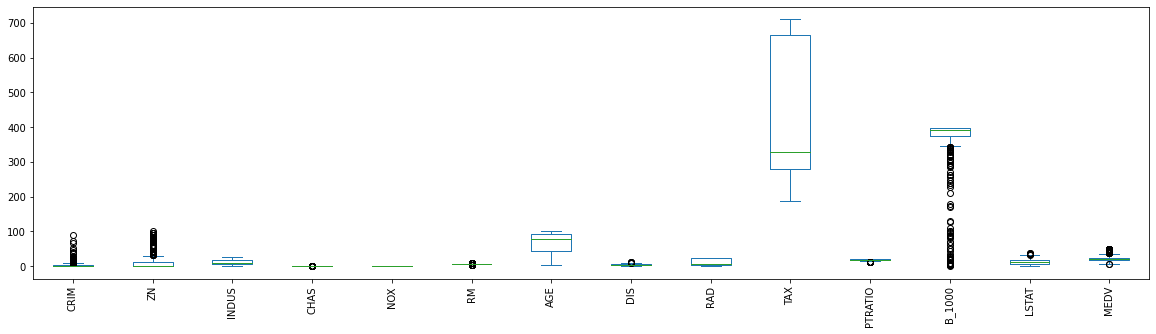

In [ ]:
data.plot.box(figsize=(20,5), rot=90)

Creamos una columna dummy con la columna DIS donde las distancias < de la media se consideran cortas (0) y las distancias > de la media largas (1)

DIS weighted distances to five Boston employment centres


*No hay necesidad, se hace por puro ejercicio teorico*

In [ ]:
data['Dummy_DIS'] = [0 if x <= data['DIS'].mean() else 1 for x in data['DIS']]

Aplicaremos a RobustScaler a la columna B_1000 que contine un gran numero de Outliers

[sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [ ]:
from sklearn.preprocessing import RobustScaler

columnsRobust = ['B_1000']
scaler = RobustScaler().fit(data[columnsRobust])
data[columnsRobust] = scaler.transform(data[columnsRobust])

Aplicaremos a MinMaxScaler a todas las columnas no procesadas anteriormente.

[sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columnsNorm = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'Dummy_DIS']
scaler = MinMaxScaler().fit(data[columnsNorm])
data[columnsNorm] = scaler.transform(data[columnsNorm])

data.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE     DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  4.0900   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  4.9671   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  4.9671   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  6.0622   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  6.0622   

        RAD       TAX   PTRATIO    B_1000     LSTAT      MEDV  Dummy_DIS  
0  0.000000  0.208015  0.287234  0.261902  0.089680  0.422222        1.0  
1  0.043478  0.104962  0.553191  0.261902  0.204470  0.368889        1.0  
2  0.043478  0.104962  0.553191  0.066675  0.063466  0.660000        1.0  
3  0.086957  0.066794  0.648936  0.153016  0.033389  0.631111        1.0  
4  0.086957  0.066794  0.648936  0.261902  0.099338  0.693333        1.0

## Exercici 3
###Resumeix les noves columnes generades de manera estadística i gràfica





A nivel estadistico, la información es totalmente diferente debido a los procesos de transformación que hemos aplicado. 

A nivel grafico no difiere visualmente, ya que las transformaciones realizadas mantienen las proporciones. 

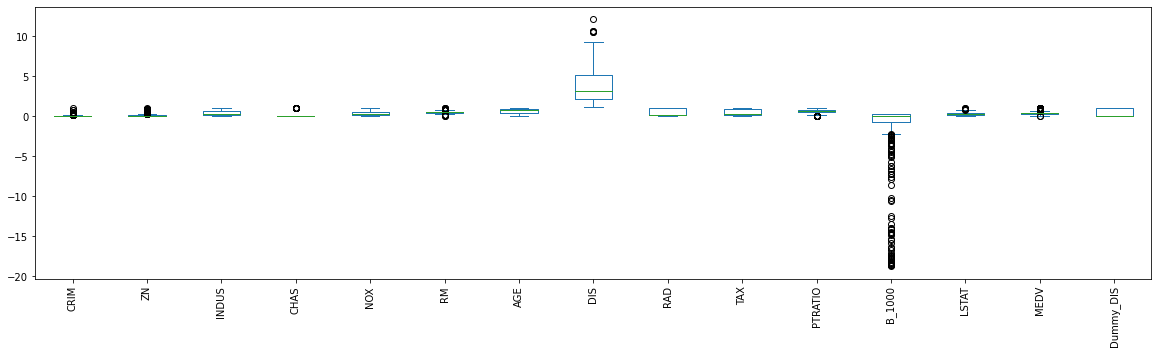

In [ ]:
data.plot.box(figsize=(20,5), rot=90)

In [ ]:
data.shape

(506, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B_1000     506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  Dummy_DIS  506 non-null    float64
dtypes: float64(15)
memory usage: 59.4 KB


In [ ]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.040544    0.113636    0.391378    0.069170    0.349167    0.521869   
std      0.096679    0.233225    0.251479    0.253994    0.238431    0.134627   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000851    0.000000    0.173387    0.000000    0.131687    0.445392   
50%      0.002812    0.000000    0.338343    0.000000    0.314815    0.507281   
75%      0.041258    0.125000    0.646628    0.000000    0.491770    0.586798   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              AGE         DIS         RAD         TAX     PTRATIO      B_1000  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.676364    3.795043    0.371713    0.422208    0.622929   -1.667632   
std      0.289896    2.1057

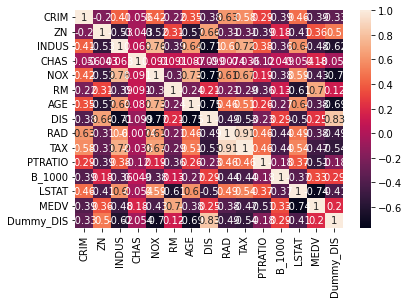

In [ ]:
corrX = data.corr()
sns.heatmap(corrX, annot=True)

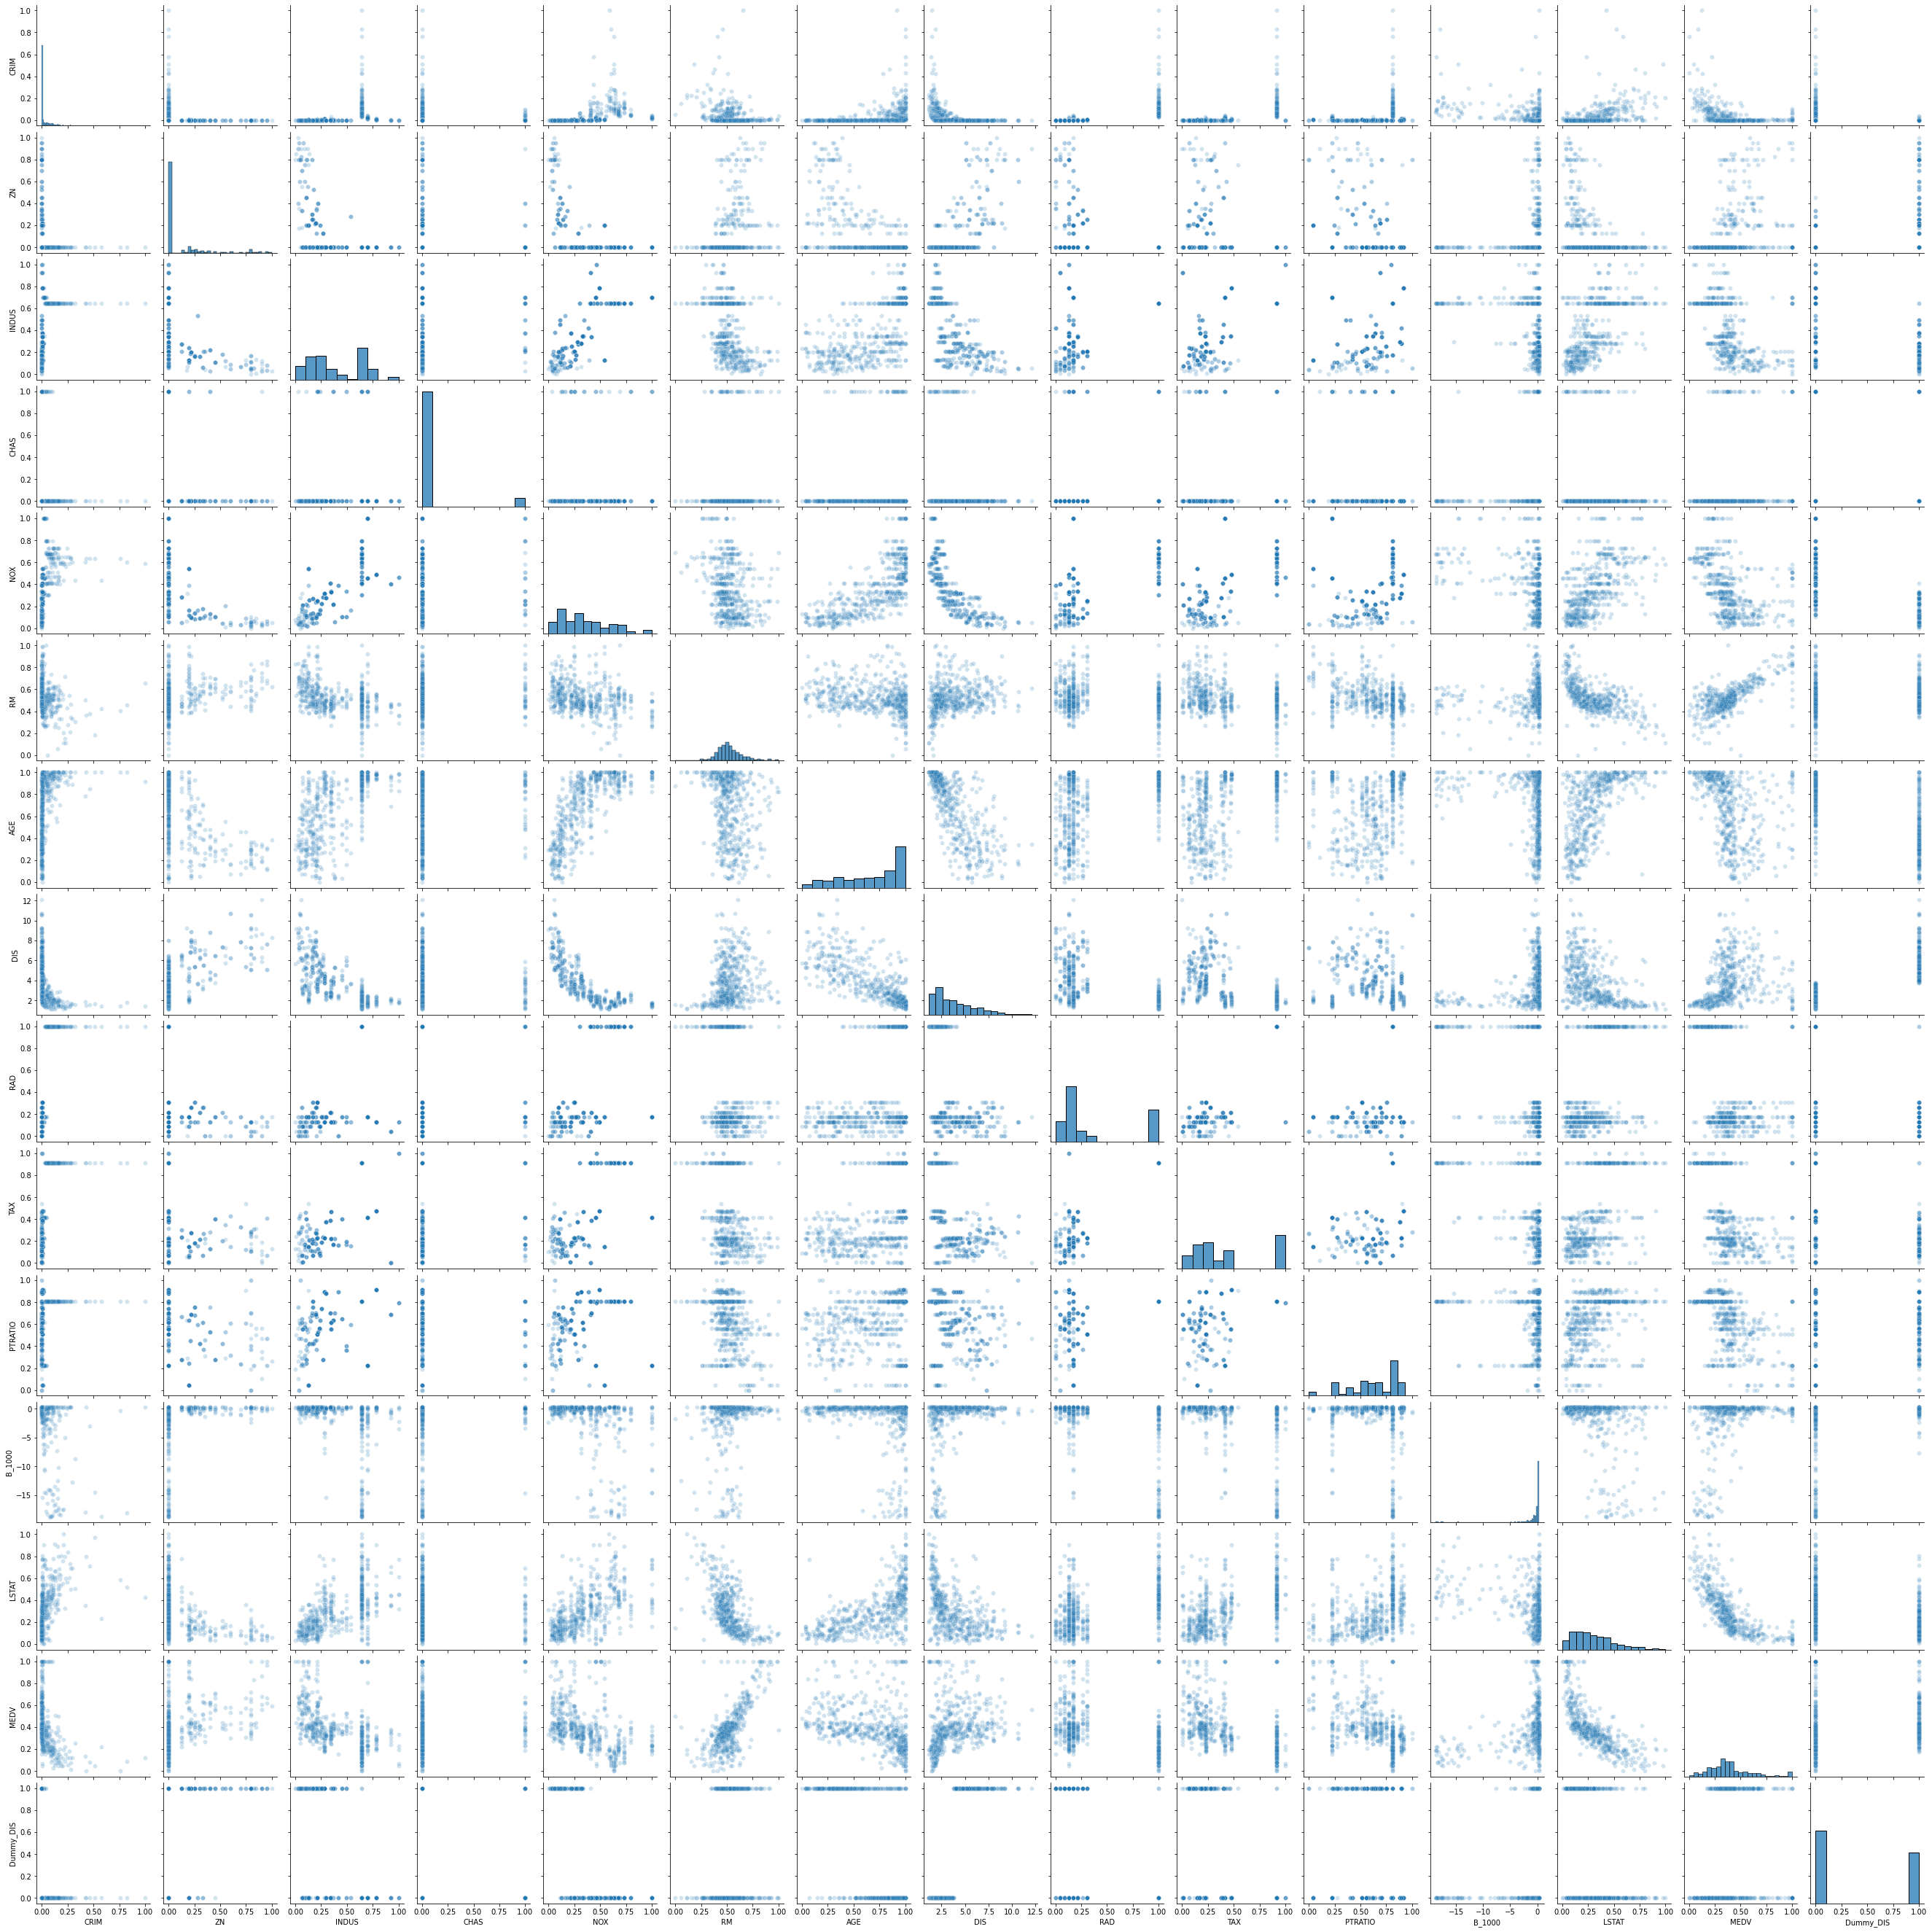

In [ ]:
sns.pairplot(data, diag_kind='hist', plot_kws={'alpha': 0.2})